In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('option-chain-ED-NIFTY-25-Jul-2024.csv')

In [18]:
df.head()

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY,BID,ASK,ASK QTY,CHNG,LTP,IV,VOLUME,CHNG IN OI,OI
1,536,-,-,-,"3,922.15",38.5,525,"3,972.25","4,179.40","1,000",...,175,4.95,5.2,"1,800",-0.85,4.95,30.66,544,209,"1,001"
2,"2,131",-13,21,-,"3,940.00",39.1,525,"3,940.25","4,087.65",900,...,"1,275",4.9,5.7,900,-0.15,5.15,30.45,"1,595",185,"7,644"
3,218,-,-,-,"3,537.70",-0.3,525,"3,635.25","4,076.85","1,000",...,150,5.05,5.95,125,-1.8,5.05,30.01,10,10,90
4,307,20,20,-,"3,830.00",-128.85,525,"3,840.60","4,008.40",525,...,800,4.7,8.3,175,-0.5,5.6,30.04,66,-7,275
5,206,-,-,-,"3,720.00",-,525,"3,763.60","3,981.05","1,000",...,800,4.1,-,-,-,7,-,-,-,78


In [3]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df.dropna(axis = 1)

In [4]:
relevant_columns = pd.DataFrame()

In [5]:
relevant_columns['LTP(Calls)'] = df.T.iloc[4]
relevant_columns['Strike Price'] = df.T.iloc[10]
relevant_columns['LTP(Puts)'] = df.T.iloc[16]

In [6]:
df2 = relevant_columns

In [7]:
spot_price = 24141.95
interest_rate = 0.0650
days_to_expire = 24
time_to_expiry = 24 / 365

In [8]:
df2['LTP(Calls)'] = df2['LTP(Calls)'].str.replace(',', '').astype(float)

In [9]:
df2['Strike Price'] = df2['Strike Price'].str.replace(',', '').astype(float)

In [10]:
df2['LTP(Puts)'] = df2['LTP(Puts)'].str.replace(',', '')
df2['LTP(Puts)'] = df2['LTP(Puts)'].replace('-', np.nan).astype(float)

In [11]:
df2['Call Theoretical'] = df2['Strike Price'] - (spot_price * np.exp(-interest_rate * time_to_expiry))
df2['Put Theoretical'] = (spot_price * np.exp(-interest_rate * time_to_expiry)) - df2['Strike Price']

In [12]:
df2['Call Arbitrage'] = df2['LTP(Calls)'] < df2['Call Theoretical']
df2['Put Arbitrage'] = df2['LTP(Puts)'] < df2['Put Theoretical']

In [13]:
call_arbitrage_count = df2['Call Arbitrage'].sum()
put_arbitrage_count = df2['Put Arbitrage'].sum()
total_arbitrage_count = call_arbitrage_count + put_arbitrage_count

In [14]:
print(f"Number of call arbitrage opportunities: {call_arbitrage_count}")
print(f"Number of put arbitrage opportunities: {put_arbitrage_count}")
print(f"Total number of arbitrage opportunities: {total_arbitrage_count}")

Number of call arbitrage opportunities: 30
Number of put arbitrage opportunities: 74
Total number of arbitrage opportunities: 104


In [16]:
df2.head()

,LTP(Calls),Strike Price,LTP(Puts),Call Theoretical,Put Theoretical,Call Arbitrage,Put Arbitrage
1,3922.15,20150.0,4.95,-3888.988152,3888.988152,False,True
2,3940.00,20200.0,5.15,-3838.988152,3838.988152,False,True
3,3537.70,20250.0,5.05,-3788.988152,3788.988152,False,True
4,3830.00,20300.0,5.60,-3738.988152,3738.988152,False,True
5,3720.00,20350.0,7.00,-3688.988152,3688.988152,False,True


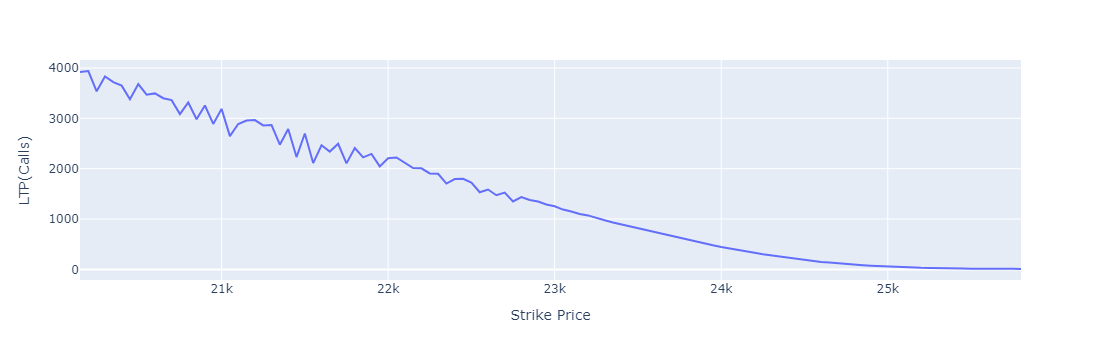

In [29]:
S = np.linspace(10000, 30000, 114)
fig  = px.line(df2, x ='Strike Price', y = 'LTP(Calls)')
fig.show()

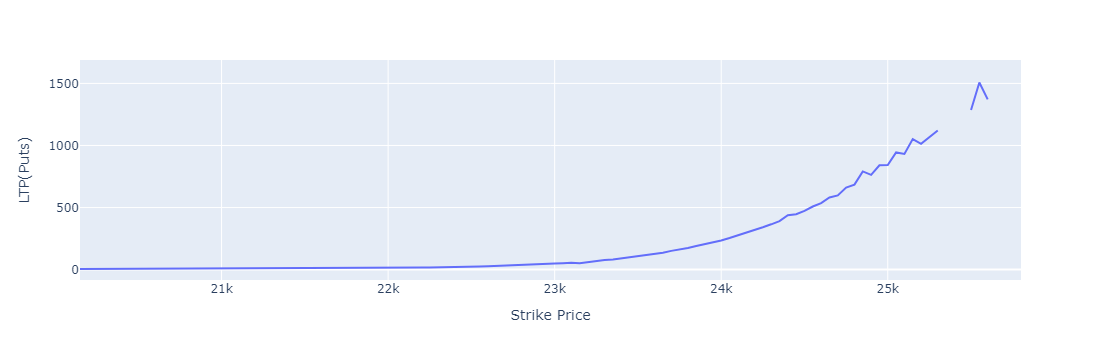

In [17]:
fig  = px.line(df2, x = 'Strike Price', y = 'LTP(Puts)')
fig.show()